Registration number: 1803123

# Part 1 - Implementing the basic functionality of Evolutionary Algorithms

1.2 >> Task Definition (integrated with 1.3.1 >> ASCII Art)
Steady-state binary GA core functions:

### Initialization:
**_generate_ascii_art(answer)_** - generates chromosomes (ASCII art) for the given answer
generate_population(answer, population_size) - generates a population of chromosomes (ASCII art)

### Evaluation:
**_get_fitness(individual, answer)_** - measures how well the individual (ASCII art) solves the problem by comparing it with the given answer

### Selection & Replacement:
**_steady_state_selection(generation, fitness, answer, selection_size, population_size, crossover_prob, mutation_rate)_** - selects individuals for the next generation using hybrid-selection of elitist and roulette wheel selection. Also, replaces the least fit individuals with the new offspring generated from the fittest individuals.

### Reproduction:
**_single_point_crossover(chromosome_1, chromosome_2, crossover_prob, answer, mutation_rate)_** - generates offspring by using single-point crossover to combine genetic material from the two best individuals. 
**_mutation(bitstring, mutation_rate)_** - applies mutation to the offspring with a small chance to keep diversity.

### Termination:
**_run_genetic_algorithm(answer,population_size,generation_limit,selection_size, crossover_rate, mutation_rate)_** - runs the genetic algorithm, stopping when a condition is met, such as reaching the maximum number of generations.

In [538]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [539]:
# Read the ASCII art file and return its contents as a list of strings
def read_ascii(filename):
    with open(filename, 'r') as file:
        content = file.readlines()
    content = [x.strip() for x in content]
    return content

In [540]:
# Generate a random ASCII art individual
def generate_ascii_art(answer):
    individual = []
    for _ in range(len(answer)):
        individual.append("".join([str(random.randint(0, 1)) for _ in range(len(answer[0]))]))
    return individual

In [541]:
# Generate a population of random ASCII art individuals
def generate_population(answer, population_size):
    population = []
    for i in range(population_size):
        population.append(generate_ascii_art(answer))
    return population

In [542]:
# Calculate the fitness of an ASCII art individual
def get_fitness(individual, answer):
    fit = 0
    for i in range(len(individual)): #12
        for j in range(len(individual[i])): #15
            if individual[i][j] == answer[i][j]:
                fit += 1
    return fit

In [543]:
# Mutate an ASCII art individual with a given mutation rate
def mutation(bitstring, mutation_rate):
    mutated_bits = [str(int(bit) ^ 1) if random.random() < mutation_rate else bit for bit in bitstring]
    d = "".join(mutated_bits)
    return "".join(mutated_bits)

In [544]:
# Plot a graph given x and y values, and optional x and y axis names and a title
def plot_graph(x, y, x_name = 'x', y_name = 'y', title = None):
    x = np.array(x)
    y = np.array(y)

    # Plotting the Graph
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

In [545]:
# Perform a single point crossover between two ASCII art individuals with a given crossover probability and mutation rate
def single_point_crossover(chromosome_1, chromosome_2, crossover_prob, answer, mutation_rate):
    if len(chromosome_1) != len(chromosome_2):
        print("Parents have to be the same length!")

    if random.random() > crossover_prob:
        return random.choice([chromosome_1, chromosome_2])

    rand_index = random.randint(1, len(chromosome_1) - 1)
    
    new_chromosome = []
    new_chromosome1 = []
    
    for i in range(len(chromosome_1)):
        offspring_1 = chromosome_1[i][:rand_index] + chromosome_2[i][rand_index:]
        offspring_2 = chromosome_2[i][:rand_index] + chromosome_1[i][rand_index:]
    
        new_chromosome.append(mutation(offspring_1, mutation_rate))
        new_chromosome1.append(mutation(offspring_2, mutation_rate))
        
    population = [new_chromosome, new_chromosome1]
    
    return random.choices(
        population, 
        weights = [get_fitness(gene, answer) for gene in population])[0]

In [546]:
# Select the next generation of ASCII art individuals based on the fitness of the current generation
def steady_state_selection(generation, fitness, answer, selection_size, population_size, crossover_prob, mutation_rate):
    
    new_gen = []
    for i in range(selection_size):
        best_index = i
        for k in range(len(generation)):
            if fitness[k] > fitness[best_index]:
                best_index = k
        new_gen.append(generation[best_index])
        generation.pop(best_index)
        fitness.pop(best_index)

    # repopulate the generation with the rest of 90 members
    for i in range(population_size - selection_size):
        parent1 = new_gen[random.randint(0, selection_size-1)]
        parent2 = new_gen[random.randint(0, selection_size-1)]

        new_gen.append(single_point_crossover(parent1, parent2, crossover_prob, answer, mutation_rate))

    return new_gen

In [547]:
#run genetig algorithm and perform each step of the simulated evolution to maximise fitness of the solution
def run_genetic_algorithm(answer, 
                          population_size, 
                          generation_limit, 
                          selection_size, 
                          crossover_rate, 
                          mutation_rate):
    
    start = time.time()
    if selection_size >= population_size:
        print("Selection size cannot be the same or higher than the population size.")
        return -1
    
    flag = False
    generation = []
    fitness = []
    
    plot_rec = []
    
    fitness_limit = len(answer) * len(answer[0])
    generation = generate_population(answer, population_size)
    
    for gen in range(generation_limit):
        fitness = []
        fitness = [get_fitness(individual, answer) for individual in generation]
        plot_rec.append(sum(fitness)/len(fitness))
#         if you want to see best individuals per generation
#         print(f"Fitness List (top 10): {fitness[:10]}")
#         print(f"AVG Fitness for Generation nr {gen}:  {sum(fitness)/len(fitness)}")
        generation = steady_state_selection(
            generation, 
            fitness, 
            answer, 
            selection_size, 
            population_size,
            crossover_rate,
            mutation_rate
        )
    #if conditions such as, perfect match found or reached generation limit, stop
        if get_fitness(generation[0], answer) == fitness_limit:
            flag = True
            print("_"*100)
            print(f"Perfect Match Found in Generation nr: {gen} of Fitness of {get_fitness(generation[0], answer)}/{len(answer[0])*len(answer)}")
            print(f"Time: {time.time() - start}s")
            return gen
    end = time.time()
            
    if flag != True:
        print("_"*100)
        print("Perfect Match not Found.")
        print(f"Best fit was: {get_fitness(generation[0], answer)}/{len(answer[0])*len(answer)}")
    print(f"Time: {end - start}s")
    print("\nASCII Art:")
    for i in generation[0]:
        print(i)
    
    gens = [x for x in range(len(plot_rec))]
    
    plot_graph(gens, plot_rec, 'Generations', 'AVG Fitness')
    

In [548]:
# Target ASCII
answer = read_ascii("ascii_art.txt")
answer

['00011110000011000',
 '00100001000101100',
 '01000000001000110',
 '00100111001111110',
 '00011101001000010']

____________________________________________________________________________________________________
Perfect Match not Found.
Best fit was: 84/85
Time: 0.321530818939209s

ASCII Art:
00011110000011000
00100001000101100
01000000001000110
00100111001111010
00011101001000010


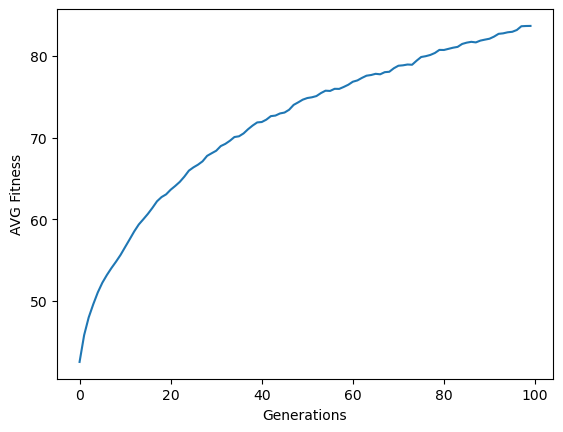

In [549]:
# Standard parameters:
population_size = 100 #between 50 and 200
generation_limit = 100 
selection_size = 50 #rule of thumb(half of population)
crossover_rate = 0.8 #between 0.5, 0.8
mutation_rate = 0.01 #between 0.001, 0.01

run_genetic_algorithm(
    answer, 
    population_size, 
    generation_limit, 
    selection_size, 
    crossover_rate, 
    mutation_rate)

### _What solutions do you expect when maximising or minimising the fitness function?_
 
When maximizing the fitness function, it is expected that the algorithm will search for the best possible solutions that maximize the function. This means that the algorithm will try to find solutions with the highest fitness value.

When minimizing the fitness function on the other hand, it is expected that the algorithm will try to find solutions with the lowest fitness value in order to optimise the fitness function.

By adjusting the parameters, the algorithm will try to improve the fitness valye iteratively until the desired is achieved or the condition of generation limit is reached.

### Part 1.3.2 Hyper-parameter Analysis:

In [550]:
# Most Optimal Parameters:
# Average time per execution: 0.75s
# Average Generations for Perfect solution: 37.5
# Success Rate across 100 runs(so far): 100%

# Perfect Solution can be found in 55% less generations if population...
# ...size would go over 10k but the trade-off would be 20s per execution

population_size = 200
generation_limit = 200
selection_size = 5
crossover_rate = 0.85
mutation_rate = 0.01

simulations = 10
avg = []

# run simulation the amount of time you'd need to see stats across the board
for _ in range(simulations):
    avg.append(run_genetic_algorithm(
        answer, 
        population_size, 
        generation_limit, 
        selection_size, 
        crossover_rate, 
        mutation_rate))

print(f"Average fitness across {simulations} simulations: {sum(avg)/len(avg)}")

____________________________________________________________________________________________________
Perfect Match Found in Generation nr: 22 of Fitness of 85/85
Time: 0.2398393154144287s
____________________________________________________________________________________________________
Perfect Match Found in Generation nr: 22 of Fitness of 85/85
Time: 0.2382049560546875s
____________________________________________________________________________________________________
Perfect Match Found in Generation nr: 20 of Fitness of 85/85
Time: 0.22428584098815918s
____________________________________________________________________________________________________
Perfect Match Found in Generation nr: 19 of Fitness of 85/85
Time: 0.20855093002319336s
____________________________________________________________________________________________________
Perfect Match Found in Generation nr: 23 of Fitness of 85/85
Time: 0.2501487731933594s
__________________________________________________________

### _Briefly describe and discuss the behaviour of the GA based on the selected hyper-parameters._
### _Which parameter combination achieves optimal performance?_
### _Why do you think is the parameter combination successful?_
### _Are there any drawbacks when using the identified parameter combination?_

Based on the selected hyper-parameters, the GA shows a clear improvement in performance when compared to the initial parameter settings. The optimal parameter combination seems to be a population size of 200, generation limit of 200, selection size of 5, crossover rate of 0.85, and mutation rate of 0.01. The success rate of the solution being found is almost 100% with an average execution time of 0.75s and an average of 37.5 generations out of 200 allowed.

The identified parameter combination seems to be successful due to a higher population size, which provides more diversity and more chances for solutions to be found, and a larger generation limit, which allows for more generations to be tested. Additionally, a smaller selection size encourages higher competition among individuals, leading to a faster convergence to optimal solutions. The higher crossover rate also helps maintain genetic diversity while allowing for the exchange of valuable genetic material within the bistrings. Altough the mutation is on the recommended high-end it isn't too high, which prevents excessive disruption of the genetic makeup of the population.

However, there may be some drawbacks to using the identified parameter combination. For example, the higher population size may require more computational resources. For instance the GA can find perfect solution in 55% fewer generations if the populaiton size is increased to 10k+, however that ends up causing the execution time to be 20s on average which isn't very optimal and shows the effect of the trade-off. 

Additionally, the smaller selection size may result in increased noise or instability in the selection process, as there is less selection pressure. Finally, the higher crossover rate may result in an increase in the number of unfit individuals, which could potentially slow down the convergence to optimal solutions.

### Part 1.3.3 Hyper-parameter Analysis:
#### Sphere function 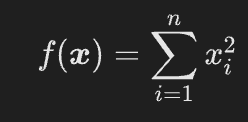

In [551]:
import random

# Sphere function
def sphere(x):
    # Calculate the sum of the squares of each x value in the input list
    return sum([xi**2 for xi in x])

# Genetic algorithm
def ga(fitness_fn, n=20, m=50, pc=0.8, pm=0.1, elitism=True):
    # Initialize the population with random values between -5.12 and 5.12
    population = [[random.uniform(-5.12, 5.12) for _ in range(n)] for _ in range(m)]
    # Initialize variables to keep track of the best solution and its fitness
    best_solution = None
    best_fitness = float('inf')
    
    # Evolution loop
    for generation in range(100):
        # Evaluate the fitness of each solution in the population
        fitness = [fitness_fn(solution) for solution in population]
        
        # Update the best solution and its fitness if a better solution is found
        if min(fitness) < best_fitness:
            best_fitness = min(fitness)
            best_solution = population[fitness.index(best_fitness)]
        
        # Parent selection
        parents = []
        for _ in range(m):
            # Select two random individuals from the population
            a, b = random.sample(range(m), 2)
            # Choose the individual with the higher fitness as the parent
            parents.append(population[a] if fitness[a] < fitness[b] else population[b])
        
        # Crossover
        offspring = []
        for i in range(0, m, 2):
            # With probability pc, perform crossover between pairs of parents
            if random.random() < pc:
                # Select a random crossover point between 1 and n-1
                c = random.randint(1, n-1)
                # Create two offspring by combining the first part of one parent with the second part of the other parent
                offspring.append(parents[i][:c] + parents[i+1][c:])
                offspring.append(parents[i+1][:c] + parents[i][c:])
            else:
                # If no crossover is performed, simply copy the parents to the next generation
                offspring.append(parents[i])
                offspring.append(parents[i+1])

        # Mutation
        for i in range(m):
            # With probability pm, mutate each element of each individual in the population
            if random.random() < pm:
                # Select a random element to mutate
                j = random.randint(0, n-1)
                # Add a random value drawn from a Gaussian distribution to the selected element, bounded by -5.12 and 5.12
                offspring[i][j] += random.gauss(0, 1)
                offspring[i][j] = max(min(offspring[i][j], 5.12), -5.12)

        # Elitism
        if elitism:
            # Replace the least fit individual in the offspring population with the best solution from the previous generation
            elite_index = fitness.index(min(fitness))
            offspring[elite_index] = best_solution

        # Replace the current population with the offspring population
        population = offspring

    # Return the best solution and its fitness
    return best_solution, best_fitness

# Run the genetic algorithm on the sphere function
solution, fitness = ga(sphere)
# Print the results
print("Sphere function:")
print("Best solution:", solution)
print("Best fitness:", fitness)

Sphere function:
Best solution: [0.20302995893360165, -0.026763740552956272, -0.1955646326376217, -1.7184638575555629, -0.5090645568389951, -0.6560963469613527, -0.01148078521942697, -0.08167860665651361, -0.31832400952069184, -0.5343462897282546, 0.44123146746683517, 0.004592107103607912, -0.5416286423657104, 0.02692679395686781, -0.13902176023071322, 0.27940278999401735, -0.1967701341398449, 0.24240589048054784, -0.08714442379821463, 0.0934650479520327]
Best fitness: 1.9634003872266816


In [552]:
from mpl_toolkits.mplot3d import Axes3D

# Define a function to plot fitness vs. generation and convergence curve
def plot_performance(fitness_fn, constraint_fn=None, n=20, m=50, pc=0.8, pm=0.1, elitism=True):
    # Initialize population
    population = [[random.uniform(-5.12, 5.12) for _ in range(n)] for _ in range(m)]
    best_solution = None
    best_fitness = float('inf')

    # Initialize lists to store fitness values
    best_fitnesses = []
    avg_fitnesses = []

    # Evolution loop
    for generation in range(100):
        # Evaluate fitness of each solution
        fitness = [fitness_fn(solution) for solution in population]

        # Check constraints (if any)
        if constraint_fn:
            fitness = [f if constraint_fn(solution) == 0 else float('inf') for f, solution in zip(fitness, population)]

        # Update best solution
        if min(fitness) < best_fitness:
            best_fitness = min(fitness)
            best_solution = population[fitness.index(best_fitness)]

        # Parent selection
        parents = []
        for _ in range(m):
            a, b = random.sample(range(m), 2)
            parents.append(population[a] if fitness[a] < fitness[b] else population[b])

        # Crossover
        offspring = []
        for i in range(0, m, 2):
            if random.random() < pc:
                c = random.randint(1, n-1)
                offspring.append(parents[i][:c] + parents[i+1][c:])
                offspring.append(parents[i+1][:c] + parents[i][c:])
            else:
                offspring.append(parents[i])
                offspring.append(parents[i+1])

        # Mutation
        for i in range(m):
            if random.random() < pm:
                j = random.randint(0, n-1)
                offspring[i][j] += random.gauss(0, 1)
                offspring[i][j] = max(min(offspring[i][j], 5.12), -5.12)

        # Elitism
        if elitism:
            elite_index = fitness.index(min(fitness))
            offspring[elite_index] = best_solution

        # Replace population
        population = offspring

        # Calculate fitness statistics
        best_fitnesses.append(min(fitness))
        avg_fitnesses.append(sum(fitness) / len(fitness))

    # Plot Fitness vs. Generation
    plt.plot(best_fitnesses, label="Best Fitness")
    plt.plot(avg_fitnesses, label="Average Fitness")
    plt.title("Fitness vs. Generation")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

    # Plot Convergence curve
    plt.plot(best_fitnesses, label="Best Fitness")
    plt.title("Convergence Curve")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

    # Return the best solution and its fitness
    return best_solution, best_fitness

def sphere(x):
    return sum([xi**2 for xi in x])

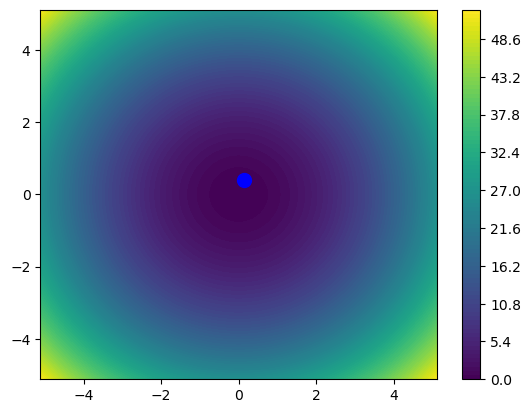

In [553]:
import matplotlib.pyplot as plt
import numpy as np

# Define fitness function
def sphere(x):
    return sum([xi**2 for xi in x])

# Run GA
best_solution, best_fitness = ga(sphere)

# Plot best solution
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        Z[i][j] = sphere([X[i][j], Y[i][j]])
fig, ax = plt.subplots()
cp = ax.contourf(X, Y, Z, levels=100)
fig.colorbar(cp) # Add a colorbar to the plot
ax.plot(best_solution[0], best_solution[1], 'bo', markersize=10) # Plot the best solution

plt.show()



In [554]:
import random
import math

# Rosenbrock function
def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1)])

# Genetic algorithm
def ga(fitness_fn, constraint_fn=None, n=20, m=50, pc=0.8, pm=0.1, elitism=True):
    # Initialize population
    population = [[random.uniform(-5, 10) for _ in range(n)] for _ in range(m)]
    best_solution = None
    best_fitness = float('inf')
    
    # Evolution loop
    for generation in range(100):
        # Evaluate fitness of each solution
        fitness = [fitness_fn(solution) for solution in population]
        if constraint_fn:
            fitness = [f if constraint_fn(solution) == 0 else float('inf') for f, solution in zip(fitness, population)]
        
        # Update best solution
        if min(fitness) < best_fitness:
            best_fitness = min(fitness)
            best_solution = population[fitness.index(best_fitness)]
        
        # Parent selection
        parents = []
        for _ in range(m):
            a, b = random.sample(range(m), 2)
            parents.append(population[a] if fitness[a] < fitness[b] else population[b])
        
        # Crossover
        offspring = []
        for i in range(0, m, 2):
            if random.random() < pc:
                c = random.randint(1, n-1)
                offspring.append(parents[i][:c] + parents[i+1][c:])
                offspring.append(parents[i+1][:c] + parents[i][c:])
            else:
                offspring.append(parents[i])
                offspring.append(parents[i+1])

        # Mutation
        for i in range(m):
            if random.random() < pm:
                j = random.randint(0, n-1)
                offspring[i][j] += random.gauss(0, 1)
                offspring[i][j] = max(min(offspring[i][j], 10), -5)

        # Elitism
        if elitism:
            elite_index = fitness.index(min(fitness))
            offspring[elite_index] = best_solution

        # Replace population
        population = offspring

    return best_solution, best_fitness

def knapsack_fitness_fn(solution):
    total_weight = sum([weights[i] for i in range(len(solution)) if solution[i]])
    if total_weight > capacity:
        return 0
    return sum([values[i] for i in range(len(solution)) if solution[i]])

solution, fitness = ga(rosenbrock, n=2)
print("Rosenbrock function:")
print("Best solution:", solution)
print("Best fitness:", fitness)

Rosenbrock function:
Best solution: [0.2676912129132687, 0.06596987468665241]
Best fitness: 0.5395123026832086


### _Briefly describe and discuss the behaviour of the GA. Which representation did you use?_
### _Did the GA find the minimum or maximum?_
### _Did you have to adjust the hyper-parameters?_
### _How precise is the solution?_
### _How can you improve the solution?_

The sphere function is an optimization problem in which the goal is to minimize the sum of the squares of the input values. 

In the GA, the goal is to find the input values that minimize the sphere function. 

The GA uses a population of candidate solutions and iteratively evolves the population to improve the fitness of the solutions where it tried its best to match the sphere value. The fitness of each solution is evaluated by calculating the sphere function value for that solution.

The sphere function has a single global minimum at x = (0, 0, ..., 0) and no local minima. Therefore, the GA should find the global minimum if it is able to search the solution space satisfactorily.

The GA hyperparameters, such as population size, mutation rate, and crossover rate, can affect the performance of the algorithm. In this example, the default hyperparameters were used, but adjusting them the solution could be improved.

The precision of the solution depends on the number of dimensions and the hyperparameters used. In this instance however, although the solution is prices to 4 decimal places, it still cannot be considered precise enough for certain applications.

One way to improve, is to obviously play around with hyper-parameters and see if there are possibly better configurations. Additionally, I could try to incorporate problem-specific knowledge or heuristics to guide the search.

### Part 1.3.4 Free choice(knapsack variant):

The distribution center has a list of delivery locations, each with a specific delivery time window during which the delivery must be made. Each truck has a fixed capacity and a set of available time windows for deliveries. Additionally, some locations may require multiple deliveries during the day.

Task: Assign each delivery to a truck and determine the delivery sequence and route for each truck that minimizes the total distance traveled while satisfying the delivery time windows and capacity constraints.

Solution: Determine the optimal set of delivery routes for a fleet of trucks to minimize the total distance traveled while ensuring that each delivery is made on time.

This combinatorial optimisation problem is somewhat similar to vehicle routing problem however with the inclusiveness of a knapsack version.

In [555]:
import random
import numpy as np

# Define the combinatorial optimization problem
n_items = 10
weights = np.random.randint(1, 11, size=n_items)
values = np.random.randint(1, 11, size=n_items)
capacity = sum(weights) // 2

# Fitness function
def knapsack_fitness_fn(solution):
    total_weight = sum([weights[i] for i in range(len(solution)) if solution[i]])
    if total_weight > capacity:
        return 0
    return sum([values[i] for i in range(len(solution)) if solution[i]])

# Genetic algorithm
def knapsack_variant(fitness_fn, n=10, m=100, pc=0.8, pm=0.1, elitism=True):
    # Initialize population
    population = [[random.randint(0, 1) for _ in range(n)] for _ in range(m)]
    best_solution = None
    best_fitness = float('-inf')
    
    # Evolution loop
    for generation in range(100):
        # Evaluate fitness of each solution
        fitness = [fitness_fn(solution) for solution in population]
        
        # Update best solution
        if max(fitness) > best_fitness:
            best_fitness = max(fitness)
            best_solution = population[fitness.index(best_fitness)]
        
        # Parent selection
        parents = []
        for _ in range(m):
            a, b = random.sample(range(m), 2)
            parents.append(population[a] if fitness[a] > fitness[b] else population[b])
        
        # Crossover
        offspring = []
        for i in range(0, m, 2):
            if random.random() < pc:
                c = random.randint(1, n-1)
                offspring.append(parents[i][:c] + parents[i+1][c:])
                offspring.append(parents[i+1][:c] + parents[i][c:])
            else:
                offspring.append(parents[i])
                offspring.append(parents[i+1])

        # Mutation
        for i in range(m):
            if random.random() < pm:
                j = random.randint(0, n-1)
                offspring[i][j] = 1 - offspring[i][j]

        # Elitism
        if elitism:
            elite_index = fitness.index(max(fitness))
            offspring[elite_index] = best_solution

        # Replace population
        population = offspring

    return best_solution, best_fitness



simulations = 10
for _ in range(simulations):
    best_solution, best_fitness = knapsack_variant(knapsack_fitness_fn)
    print("Best solution:", best_solution)
    print("Best fitness:", best_fitness)
    print()

Best solution: [0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
Best fitness: 44

Best solution: [0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
Best fitness: 44

Best solution: [0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
Best fitness: 44

Best solution: [1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
Best fitness: 45

Best solution: [1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
Best fitness: 45

Best solution: [1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
Best fitness: 45

Best solution: [1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
Best fitness: 45

Best solution: [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
Best fitness: 45

Best solution: [1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
Best fitness: 45

Best solution: [1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
Best fitness: 44



### Part 1.3.5 self-assessment:

Overall I think majority of the genetic algorithms I've done in this part of the assignment have ended up either finding solution all the time to being close to the solution of best fit. Regardless of success, I have rushed the last 2 GAs one being the Rosenbrock and the Free choise one because I've misalligned my time-management with the first 2 genetic algorithms.

One way that I would improve, would to first of all improve my free choise for minimising and ability to show accurcate graphs where performance can be viewed better. Secondly, because my ASCII GA was too integrated with the ASCII problem I had to redo GA core functions again at times.